# Suport Vector Machine on Social Network Ads data

* Project: Social Network running an add to check how many of its users bought an SUV
* Project Scope: Analyze,Visualize and apply Suport Vector Machine model  on Social Network Ads data
* Data source: Social_Network_Ads.csv file
* The data contains the following columns:
    * 'User ID': Social Networks users login id
    * 'Gender': Gender of the user
    * 'Age': Age of the user
    * 'EstimatedSalary': Estimated Salary of the user
    * 'Purchased': User purchased (1) or not (0)

## Import libraries & Load data

In [1]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('Social_Network_Ads.csv')

## Lets check the data

In [2]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


* We can see there are 5 Columns and its datatypes:
* Out of 5 columns, 4 are input variables/features (X), 1 output /target variable (y) 
* There are 400 rows/training examples (m)

In [3]:
# Checking for null columns
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

we see that there are no null data in any columns

In [4]:
# lets check the data
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Data in this data set is self explanatory

In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


this gives descriptive statistics that sumarize the central tendency of numarical columns

    * we can see Average age in this social network is just over 37 years
    * Average salary is about $70,000
    * About 35% of the social network about the suv  

## Let's analyze and visualize data

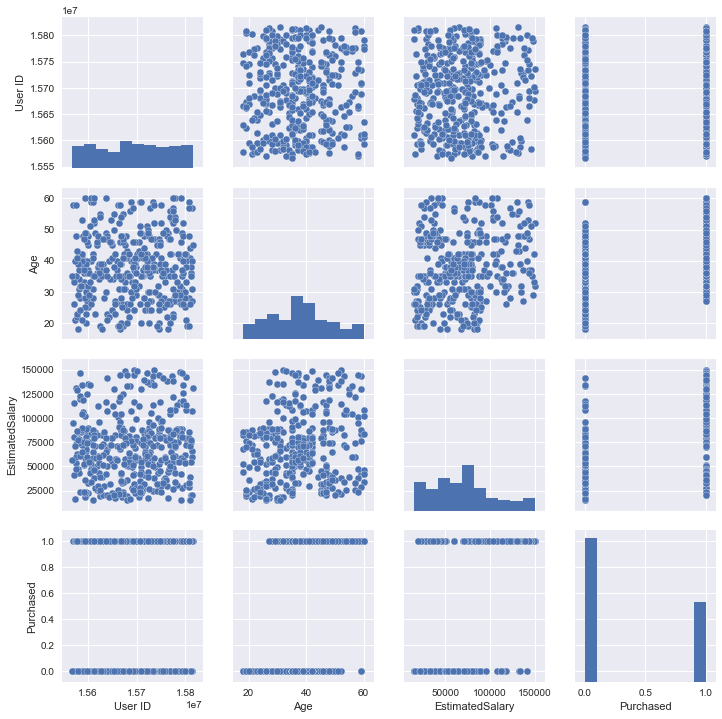

In [6]:
sns.pairplot(dataset)
plt.show()

* We can notice in age vs purchased graph that more older social network uses purchases suv  
* We can see young users salary is less than $100k, as the age increases, salary is more diverse
* Also we can notice that about one third used purchases SUV

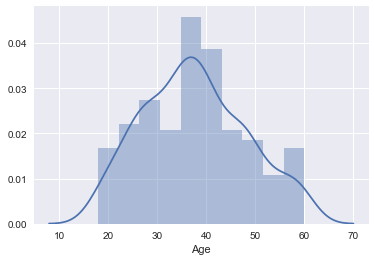

In [7]:
sns.distplot(dataset['Age'])
plt.show()

Users Age is normally distributed

In [8]:
dataset['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

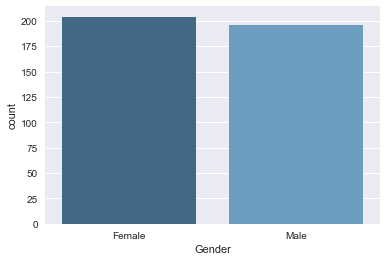

In [9]:
sns.countplot(x = 'Gender', 
              data = dataset,
              palette ='Blues_d',
              order = dataset['Gender'].value_counts().index)
plt.show()

We can see slightly women uses are involved in this project (Female:204, Male: 196)

In [10]:
Purchased_dataset = dataset[dataset['Purchased'] == 1]

In [11]:
Purchased_dataset['Gender'].value_counts()

Female    77
Male      66
Name: Gender, dtype: int64

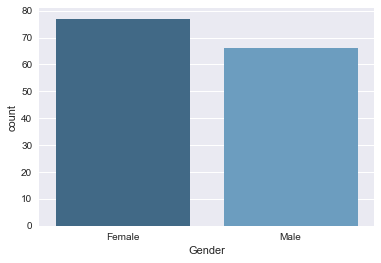

In [12]:
sns.countplot(x = 'Gender', 
              data = Purchased_dataset,
              palette ='Blues_d',
              order = Purchased_dataset['Gender'].value_counts().index)
plt.show()

We can see slightly more women are Purchased SUV (Female: 77, Male: 66)

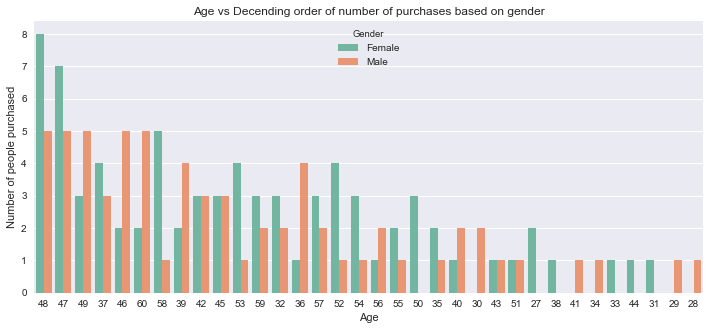

In [13]:
# Decending order of number of purchases based on gender 
plt.figure(figsize=(12,5))
sns.countplot(x= 'Age', 
              data=Purchased_dataset, 
              hue='Gender',
              palette='Set2', 
              order = Purchased_dataset['Age'].value_counts().index)
plt.xlabel('Age')
plt.ylabel('Number of people purchased')
plt.title('Age vs Decending order of number of purchases based on gender')
plt.show()

# Implementing the model

Lets first convert the Gender. For male:0, Female:1

If the column got more categories, we can use LabelEncoder and then OneHotEncoder to make the column into binary

** LabelEncoder to convert each category into interger **
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:, 0])

** OneHotEncoder to convert interger into binary **
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

In [14]:
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})

In [15]:
X = dataset[['Gender','Age', 'EstimatedSalary']]
y = dataset['Purchased']

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# Lets see the training and test sets
for item in [X_train, y_train, X_test, y_test]:
    print(item.shape)

(300, 3)
(300,)
(100, 3)
(100,)


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [19]:
# Lets see how the data will be after feature scaling
X_train[:2,:]

array([[ 0.98019606,  0.58164944, -0.88670699],
       [-1.02020406, -0.60673761,  1.46173768]])

In [20]:
X_test[:2,:]

array([[-1.02020406, -0.54748976,  0.5130727 ],
       [ 0.98019606,  0.15442019, -0.61825566]])

## Fitting Suport Vector Machine Model to the Training set

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state = 99)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=99, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# Lets check the accuracy of train and test results
print("Training set accuracy: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(classifier.score(X_test, y_test)))

Training set accuracy: 0.823
Test set accuracy: 0.890


We got good accuracy for test results. But lets see if we can increace it by adding regularization and gamma parameters

## Grid search with Regularization and Gamma

The default regularization value (C)=1 and gama ='auto' gave us 82% accuracy on training dataset and 89% accuracy on test dataset. Lets try on different regularization values(C): [0.1,1, 10, 100], and Gamma values (gamma): [1,0.1,0.01,0.001]

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

Now lets take this grid model to predict the test set

## Predicting the test results with Grid model

In [29]:
y_grid_pred = grid.predict(X_test)

## Evaluating the model

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_grid_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [32]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_grid_pred))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



We can see our Support Vector Machine model accuracy has increased to 93% from 89% on test data. This is pretty good given the size of the dataset we have.